In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from copy import deepcopy as copy
import matplotlib.backends.backend_pdf
import scipy as sp
import scipy.stats as stats
import math
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
# plotly.tools.set_credentials_file(username='mhossa10', api_key='CSWpOV3xHUVRzimjfHSB')

In [5]:
color_list1 = ['#1b9e77', '#d95f02', '#7570b3', '#e7298a', '#66a61e', '#e6ab02']
color_list2 = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33']
color_list3 = ['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c']

In [8]:
graph_name = [
    'ecology1'
    , 'nlpkkt160'
    , 'nlpkkt240'
    , 'G3_circuit'
    , 'NLR'
    , 'asia'
    , 'cage15'
    , 'coPapersCiteseer'
    , 'coPapersDBLP'
    , 'kkt_power'
    , 'uk-2002'
]
graph_list = [
    'input/ecology1'
    , 'input/nlpkkt160'
    , 'input/nlpkkt240'
    , 'input/G3'
    , 'input/NLR'
    , 'input/asia'
    , 'nput/cage15'
    , 'input/coPapersCiteseer'
    , 'input/coPapersDBLP'
    , 'input/kkt'
    , 'input/uk-2002'
]

In [94]:
SpMV_p2p = pd.read_csv('CSR_SpMV_on_MPI.csv')
SpMV_comm = pd.read_csv('CSR_Comm_on_MPI.csv')
SpMV_local_mult = pd.read_csv('CSR_Local_Matmul_on_MPI.csv')
SpMV_p2p = SpMV_p2p.groupby('Name').mean()
SpMV_p2p = SpMV_p2p.reset_index()
SpMV_comm = SpMV_comm.groupby('Name').mean()
SpMV_comm = SpMV_comm.reset_index()
SpMV_local_mult = SpMV_local_mult.groupby('Name').mean()
SpMV_local_mult = SpMV_local_mult.reset_index()

for index,row in SpMV_p2p.iterrows():
    print(row['Name'], ' compare: ', row['AvgTime']/(SpMV_comm.iloc[index]['AvgTime'] + SpMV_local_mult.iloc[index]['AvgTime']))

input/G3  compare:  1.2145395026754802
input/NLR  compare:  1.2646697034734657
input/asia  compare:  1.3583664303875027
input/cage15  compare:  0.9395484183492463
input/coPapersCiteseer  compare:  0.8445226725535221
input/coPapersDBLP  compare:  0.906738375640548
input/ecology1  compare:  1.2143197708195603
input/kkt  compare:  1.0100794842637362
input/nlpkkt160  compare:  0.962366553628679
input/nlpkkt240  compare:  1.0960659930685248
input/thermal2  compare:  1.023719165085389
input/uk-2002  compare:  0.9464036140014247


,Name,MatrixSize,MaxRow,MinTime,MaxTime,AvgTime,TotalRun,nProcess,NonZeroPerRow,NonZeroPerBlock,AvgCommunication,AvgInterProcessCall,SizeOfData,DiagonalElem,OffDiagonalElem,Bandwidth,InDiagonalBandwidth
2,input/asia,11950757,95360,0.493375,0.495812,0.494688,100,128,2.0,240251,4.141,4.156,8,189120,12,11014530,93705
4,input/coPapersCiteseer,434102,3493,3.143687,3.150063,3.147563,100,128,260.0,908341,36.453,122.328,8,262434,28816,433661,3490
6,input/ecology1,1000000,7850,0.229529,0.232353,0.230882,100,128,4.0,31400,70.234,5.312,8,30846,414,734402,281
10,input/thermal2,1227087,9847,0.240000,0.242000,0.241000,100,128,6.0,59024,74.641,5.000,8,56486,603,1023979,9772
5,input/coPapersDBLP,540486,4349,5.066187,5.075688,5.070875,100,128,128.0,543489,85.578,126.875,8,188288,28750,540472,4346
0,input/G3,1585478,12697,0.344529,0.347529,0.346176,100,128,3.0,49345,124.484,5.094,8,47322,616,1237803,10539
1,input/NLR,4163763,33402,0.745250,0.748188,0.746812,100,128,6.0,200418,127.773,5.406,8,193582,1488,3383592,33394
7,input/kkt,2063494,16605,1.636059,1.644059,1.641412,100,128,6.0,114851,196.688,18.516,8,93508,6820,1950323,12959
11,input/uk-2002,18520486,149039,15.439706,15.469059,15.453941,100,128,66.0,9545229,273.852,124.031,8,9520000,25229,18519040,148946
3,input/cage15,5154859,41482,9.692882,9.713765,9.704059,100,128,34.0,1435555,1357.195,37.312,8,602278,67195,5110871,41066


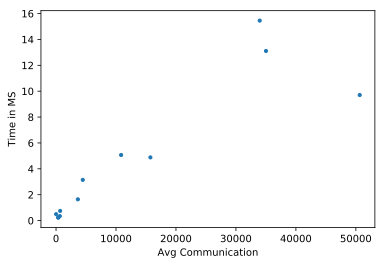

In [80]:
plt.scatter(SpMV_comm['AvgCommunication']*SpMV_comm['AvgInterProcessCall'], SpMV_comm['AvgTime'], s=10)
plt.xlabel('Avg Communication')
plt.ylabel('Time in MS')
SpMV_comm = SpMV_comm.sort_values(by=['AvgCommunication', 'NonZeroPerBlock', 'NonZeroPerRow'])
SpMV_comm

# Linear Model of SpMV Baseed on Non Zero Per Row and Block

Mean squared error: 2.36
R²: 0.99
intercept:  [1.04332244]
Coef:  [[-8.93869257e-03  6.12370465e-06]]
Linear Equation: y =  1.0433224432739046  +  -0.008938692566575673  * x


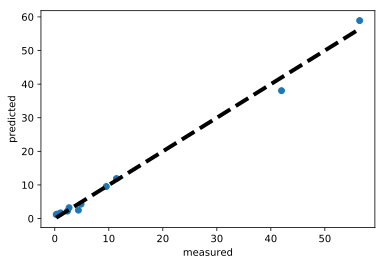

In [84]:
pdf = matplotlib.backends.backend_pdf.PdfPages("Non_Zero_Per_Row_and_Block_vs_Local_Matmul.pdf")
SpMV_local_mult = SpMV_local_mult.sort_values(by=['NonZeroPerBlock', 'NonZeroPerRow'])
y_test = SpMV_local_mult[['AvgTime']]
reg = LinearRegression()
reg.fit(SpMV_local_mult[['NonZeroPerRow','NonZeroPerBlock']], SpMV_local_mult[['AvgTime']])
y_predicted = reg.predict(SpMV_local_mult[['NonZeroPerRow','NonZeroPerBlock']])
print("Mean squared error: %.2f" % mean_squared_error(SpMV_local_mult[['AvgTime']], y_predicted))
print('R²: %.2f' % r2_score(SpMV_local_mult[['AvgTime']], y_predicted))
print('intercept: ', reg.intercept_)
print('Coef: ', reg.coef_)
print('Linear Equation: y = ', reg.intercept_[0], ' + ',  reg.coef_[0][0], ' * x')
fig, ax = plt.subplots()
ax.scatter(SpMV_local_mult[['AvgTime']], y_predicted)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('measured')
ax.set_ylabel('predicted')
# plt.show()
pdf.savefig(bbox_inches = 'tight')
pdf.close()

Mean squared error: 1.52
R²: 0.94
intercept:  [-2.27635383]
Coef:  [[ 1.10406625e-02  8.23198746e-02  3.82907073e-07 -1.41168089e-04]]
Linear Equation of comm: y =  -2.2763538313741254  +  0.011040662510096333  * x


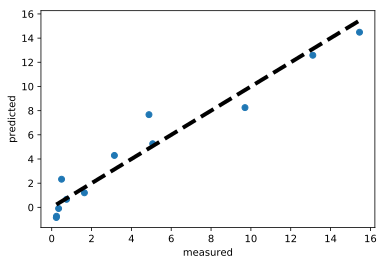

In [86]:
pdf = matplotlib.backends.backend_pdf.PdfPages("AvgCommunication_AvgInterProcessCall_Bandwidth_and_OffDiagonalElem_vs_Global_Matmul.pdf")
SpMV_comm = SpMV_comm.sort_values(by=['AvgCommunication', 'AvgInterProcessCall', 'Bandwidth', 'OffDiagonalElem'])
y_test = SpMV_comm[['AvgTime']]
reg_comm = LinearRegression()
reg_comm.fit(SpMV_comm[['AvgCommunication','AvgInterProcessCall', 'Bandwidth', 'OffDiagonalElem']], SpMV_comm[['AvgTime']])
y_predicted = reg_comm.predict(SpMV_comm[['AvgCommunication','AvgInterProcessCall', 'Bandwidth', 'OffDiagonalElem']])
print("Mean squared error: %.2f" % mean_squared_error(SpMV_comm[['AvgTime']], y_predicted))
print('R²: %.2f' % r2_score(SpMV_comm[['AvgTime']], y_predicted))
print('intercept: ', reg_comm.intercept_)
print('Coef: ', reg_comm.coef_)
print('Linear Equation of comm: y = ', reg_comm.intercept_[0], ' + ',  reg_comm.coef_[0][0], ' * x')
fig, ax = plt.subplots()
ax.scatter(SpMV_comm[['AvgTime']], y_predicted)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('measured')
ax.set_ylabel('predicted')
# plt.show()
pdf.savefig(bbox_inches = 'tight')
pdf.close()

# Prediction

In [51]:
SpMV_p2p = pd.read_csv('CSR_SpMV_on_MPI.csv')
SpMV_p2p = SpMV_p2p[SpMV_p2p['Name'] == 'input/thermal2']
SpMV_p2p.head()
y_predicted_local_matmul = reg.predict(SpMV_p2p[['NonZeroPerRow','NonZeroPerBlock']])
y_predicted_comm = reg_comm.predict(SpMV_p2p[['AvgCommunication','AvgInterProcessCall', 'Bandwidth', 'OffDiagonalElem']])
print('Local mat mul: ', y_predicted_local_matmul + y_predicted_comm, ' actual: ', SpMV_p2p['AvgTime'])

Local mat mul:  [[0.46853377]]  actual:  165    1.079
Name: AvgTime, dtype: float64


In [96]:
df_row

,Name,MatrixSize,MaxRow,MinTime,MaxTime,AvgTime,TotalRun,nProcess,NonZeroPerRow,NonZeroPerBlock,AvgCommunication,AvgInterProcessCall,SizeOfData,DiagonalElem,OffDiagonalElem,Bandwidth,InDiagonalBandwidth
6,input/ecology1,1000000,7850,0.593000,0.595733,0.594267,100,128,4.0,31400,70.234,5.312,8,30846,414,734402,281
0,input/G3,1585478,12697,0.944067,0.946733,0.945733,100,128,3.0,49345,124.484,5.094,8,47322,616,1237803,10539
10,input/thermal2,1227087,9847,1.078000,1.080000,1.079000,100,128,6.0,59024,74.641,5.000,8,56486,603,1023979,9772
7,input/kkt,2063494,16605,2.732533,2.740733,2.737933,100,128,6.0,114851,196.688,18.516,8,93508,6820,1950323,12959
1,input/NLR,4163763,33402,3.909600,3.912467,3.911133,100,128,6.0,200418,127.773,5.406,8,193582,1488,3383592,33394
2,input/asia,11950757,95360,6.612267,6.614667,6.613733,100,128,2.0,240251,4.141,4.156,8,189120,12,11014530,93705
5,input/coPapersDBLP,540486,4349,6.992467,7.001467,6.996733,100,128,128.0,543489,85.578,126.875,8,188288,28750,540472,4346
4,input/coPapersCiteseer,434102,3493,6.766667,6.773600,6.771267,100,128,260.0,908341,36.453,122.328,8,262434,28816,433661,3490
3,input/cage15,5154859,41482,18.064600,18.085867,18.075933,100,128,34.0,1435555,1357.195,37.312,8,602278,67195,5110871,41066
8,input/nlpkkt160,8345600,67159,15.680200,15.688400,15.684533,100,128,27.0,1813293,1503.312,10.469,8,1589682,73572,7500388,3758


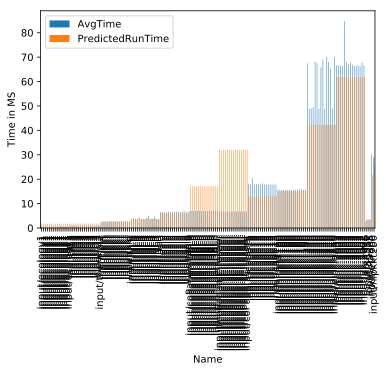

In [98]:
pdf = matplotlib.backends.backend_pdf.PdfPages("CSR_SpMV_based_on_Performance_Model.pdf")
# Linear Equation: y =  4.123269340662652  +  6.479938398441676e-05  * x  +  1.5327471334248416e-11  * x^2
SpMV_p2p = pd.read_csv('CSR_SpMV_on_MPI.csv')
SpMV_p2p_test = pd.read_csv('CSR_SpMV_on_MPI_Test.csv')
SpMV_p2p = SpMV_p2p.sort_values(by=['NonZeroPerBlock', 'NonZeroPerRow'])
SpMV_p2p_test = SpMV_p2p_test.sort_values(by=['NonZeroPerBlock', 'NonZeroPerRow'])
SpMVPredictor = pd.concat([SpMV_p2p, SpMV_p2p_test])
predictedRuntime = []
error = []
for index,row in SpMVPredictor.iterrows():
    T1 = (5.970439077936305 + (0.7157563117453349*row['NonZeroPerRow']))
    T2 = 1.110570674949308  + ( 5.5240516784695596e-05 * row['MatrixSize']/128)
    T3 = 1.110570674949308  + ( 5.5240516784695596e-05 * 122880)
    T0 = T1/T3*T2
    comm_data = row['AvgCommunication']*row['SizeOfData']
    comm_latency = 4.123269340662652  +  (6.479938398441676e-05  * comm_data) +  (1.5327471334248416e-11 * comm_data * comm_data)
    predicted_time = T0 + (row['AvgInterProcessCall'] * comm_latency/1000)
    error.append(predicted_time/row['AvgTime'])
    predictedRuntime.append(predicted_time)
    
    
SpMVPredictor['PredictedRunTime'] = predictedRuntime
SpMVPredictor['Error'] = error
ax = SpMVPredictor.plot(kind='bar', x='Name', y=['AvgTime', 'PredictedRunTime'])
ax.set_ylabel('Time in MS')
pdf.savefig(bbox_inches = 'tight')
pdf.close()
SpMVPredictor[['Name', 'AvgCommunication','AvgInterProcessCall', 'MaxRow', 'DiagonalElem', 'OffDiagonalElem', 'NonZeroPerRow','NonZeroPerBlock','AvgTime','PredictedRunTime', 'Error']].to_csv("CSR_SpMV_based_on_Performance_Model.csv")


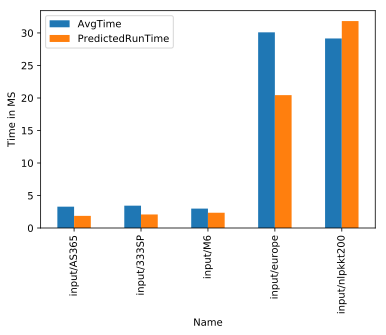

In [77]:
pdf = matplotlib.backends.backend_pdf.PdfPages("CSR_SpMV_based_on_Real_Data.pdf")
SpMV_p2p_test = pd.read_csv('CSR_SpMV_on_MPI_Test.csv')
y_predicted_local_matmul = reg.predict(SpMV_p2p_test[['NonZeroPerRow','NonZeroPerBlock']])
y_predicted_comm = reg_comm.predict(SpMV_p2p_test[['AvgCommunication','AvgInterProcessCall', 'Bandwidth', 'OffDiagonalElem']])
predict = y_predicted_local_matmul + y_predicted_comm
SpMV_p2p_test['PredictedRunTime'] = predict.flatten()
SpMV_p2p_test['Error'] = SpMV_p2p_test['AvgTime']/predict.flatten()
ax = SpMV_p2p_test.plot(kind='bar', x='Name', y=['AvgTime', 'PredictedRunTime'])
ax.set_ylabel('Time in MS')
pdf.savefig(bbox_inches = 'tight')
pdf.close()
SpMV_p2p_test[['Name', 'AvgCommunication','AvgInterProcessCall', 'MaxRow', 'DiagonalElem', 'OffDiagonalElem', 'NonZeroPerRow','NonZeroPerBlock','AvgTime','PredictedRunTime', 'Error']].to_csv("CSR_SpMV_based_on_Real_Data.csv")

In [73]:
from functools import reduce
predict.flatten()

array([1.86681605, 2.08472294])